### Mooring Timeseries Resampler

In [182]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [89]:
path='/Users/bell//in_and_outbox/2019/stabeno/sep/'
s37_60m = pd.read_csv(path+'17bsm2a_s37_0060m.interpolated.trimmed_missing.csv',
                   parse_dates=True,index_col='time').resample('3H').mean()
sc_44m = pd.read_csv('/Users/bell//in_and_outbox/2019/stabeno/sep/17bsm2a_sc_0044m.interpolated.trimmed_missing.csv',
                   parse_dates=True,index_col='time').resample('3H').mean()
prawl = pd.read_csv('/Users/bell//in_and_outbox/2019/stabeno/sep/17bsitaepr-2a_bottom_temp.csv',
                   parse_dates=True,index_col='datetime').resample('3H').mean()

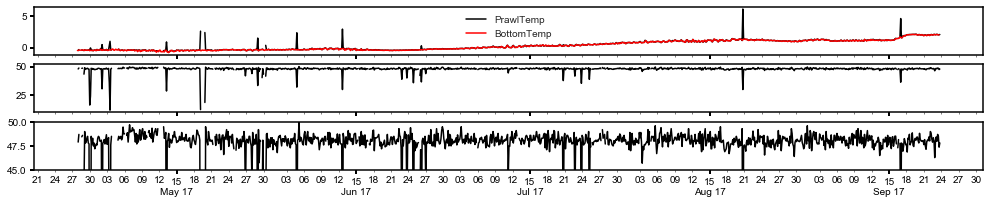

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex='col',figsize=(17,3))
ax1.plot(prawl.index,prawl['btemp'],'k')
ax1.plot(sc_44m.index,s37_60m[' T_20'],'r')
ax1.legend(['PrawlTemp','BottomTemp'])

ax2.plot(prawl.index,prawl['bpress'],'k')
ax3.plot(prawl.index,prawl['bpress'],'k')
ax3.set_ylim([45,50])

xfmt = mdates.DateFormatter('%d-%b')
ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
ax1.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax1.xaxis.set_tick_params(which='major', pad=3)
ax1.xaxis.set_tick_params(which='minor', pad=5)



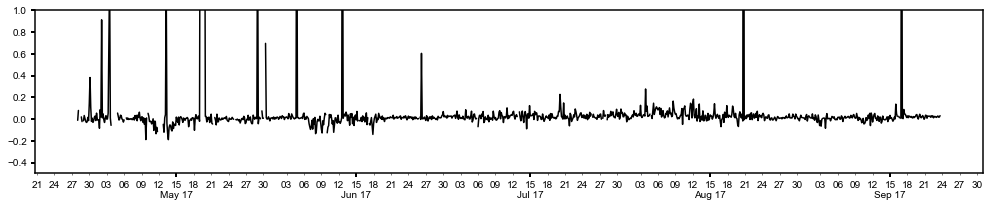

In [75]:
fig, ax1 = plt.subplots(1,1,sharex='col',figsize=(17,3))
ax1.plot(prawl.index[:-1],prawl['btemp'][:-1].values-s37_60m[' T_20'][1::].values,'k')
ax1.set_ylim([-.5,1])

xfmt = mdates.DateFormatter('%d-%b')
ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
ax1.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax1.xaxis.set_tick_params(which='major', pad=3)
ax1.xaxis.set_tick_params(which='minor', pad=5)

In [81]:
import numpy as np
np.nanmean(prawl['btemp'][:-1].values-s37_60m[' T_20'][1::].values)

0.04072646575885972

In [88]:
import xarray as xa

In [177]:
xdf = xa.open_dataset(path+'18BS2C_T_20_gridded.cf.nc')

2018-10-03T00:00:00.000000000, 7.72659031764881
2018-10-03T01:00:00.000000000, 7.723024629257821
2018-10-03T02:00:00.000000000, 7.714471220970154
2018-10-03T03:00:00.000000000, 7.710805296897888
2018-10-03T04:00:00.000000000, 7.705114690033165
2018-10-03T05:00:00.000000000, 7.708994549673957
2018-10-03T06:00:00.000000000, 7.714529372550346
2018-10-03T07:00:00.000000000, 7.698697866620244
2018-10-03T08:00:00.000000000, 7.98343496064882
2018-10-03T09:00:00.000000000, 7.687398736541335
2018-10-03T09:59:59.000000000, 7.80620564318992
2018-10-03T11:00:00.000000000, 7.67831619043608
2018-10-03T12:00:00.000000000, 7.7577094322926285
2018-10-03T12:59:59.000000000, 7.669300598067206
2018-10-03T14:00:00.000000000, 7.786316826536849
2018-10-03T15:00:00.000000000, 7.692970314541379
2018-10-03T15:59:59.000000000, 7.690609648421004
2018-10-03T16:59:59.000000000, 7.699872313319026
2018-10-03T17:59:59.000000000, 7.722166145170057
2018-10-03T18:59:59.000000000, 7.869580400956644
2018-10-03T19:59:59.000

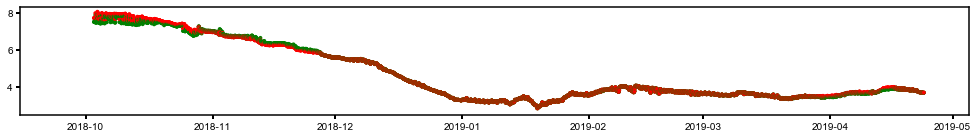

In [180]:
print_values=True
fig, ax = plt.subplots(figsize=(17, 2))

for i in range(0,4872):
    pdf = xdf.T_20[i,:,0,0].to_dataframe()
    pdf[pdf == 1e35] = np.nan
    #only use available data... bias towards prawler
    IntTemp = np.interp(np.arange(0,74,1),pdf.index.values, pdf.T_20.values, right=np.nan, left=np.nan)
    cs = ax.scatter(pdf.time[pdf.index[0]], np.nanmean(IntTemp), s=15, c='g', marker='o', edgecolor='none')

    #extrapolate to top and bottom
    IntTemp = np.interp(np.arange(0,74,1),pdf.index.values, pdf.T_20.values)
    cs = ax.scatter(pdf.time[pdf.index[0]], np.nanmean(IntTemp), s=15, c='r', marker='o', edgecolor='none')

    if print_values:
        print(f"{pdf.time[pdf.index[0]]}, {np.nanmean(IntTemp)}")



In [176]:
from netCDF4 import num2date
num2date(178230,'hours since 1995-01-01',calendar='standard')

datetime.datetime(2015, 5, 2, 6, 0)

In [99]:
df = pd.read_excel('/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/M2DepthAve_May-Aug.xlsx',
                  parse_dates=True,index_col='date')

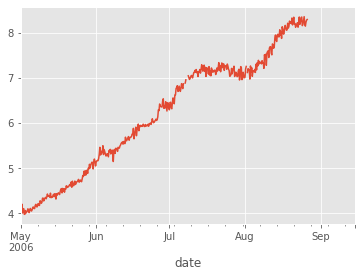

In [100]:
df.resample('6H').median()['2019p'].plot()

In [103]:
#(df.resample('6H').median()['2019p']).to_csv('2019p.csv')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [186]:
df=pd.read_csv('/Users/bell/in_and_outbox/2019/stabeno/sep/18BS2C_inttemp_1hr.interim.csv',
               parse_dates=True, index_col='datetime')

In [192]:
df.resample('6H').median()[' inttemp'].to_csv('/Users/bell/in_and_outbox/2019/stabeno/sep/18BS2C_inttemp_6hr.interim.csv')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


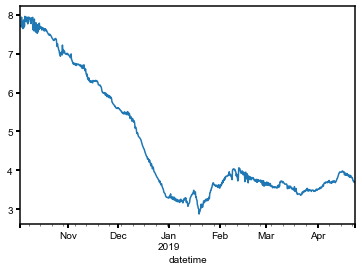

In [193]:
df.resample('6H').median()[' inttemp'].plot()

In [195]:
df=pd.read_csv('/Users/bell/Desktop/16bs8a_s39_0067m.csv',
               parse_dates=True, index_col='time')

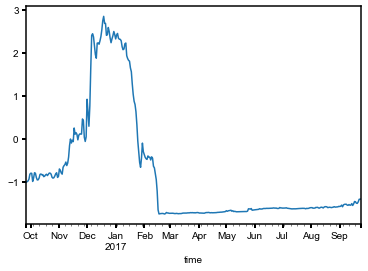

In [199]:
df.resample('D').mean()[' T_20'].plot()